In [ ]:
!pip install --quiet pytorch-lightning==1.2.5


     |████████████████████████████████| 826 kB 14.5 MB/s 
     |████████████████████████████████| 132 kB 70.2 MB/s 
     |████████████████████████████████| 596 kB 36.5 MB/s 
     |████████████████████████████████| 829 kB 71.2 MB/s 
     |████████████████████████████████| 332 kB 66.3 MB/s 
     |████████████████████████████████| 1.1 MB 52.6 MB/s 
     |████████████████████████████████| 192 kB 56.3 MB/s 
     |████████████████████████████████| 160 kB 8.5 MB/s 
     |████████████████████████████████| 271 kB 52.6 MB/s 


In [ ]:
!pip install --quiet tqdm==4.59.0

     |████████████████████████████████| 74 kB 1.8 MB/s 


In [ ]:
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import pytorch_lightning as pl
from sklearn.preprocessing import MinMaxScaler

import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.nn.functional as F 
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader


In [ ]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"] 

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize']=12,8

tqdm.pandas()

In [ ]:
pl.seed_everything(42)

Global seed set to 42


42

In [ ]:
df=pd.read_csv('Apple_Nasd.csv')
df

,Date,Appl_Open,Appl_High,Appl_Low,Appl_Close,Appl_Adj_Close,Appl_Volume,Appl_Diff,Appl_Diff_Percent,Appl_EPS,Nasd_Open,Nasd_High,Nasd_Low,Nasd_Close,Nasd_Adj_Close,Nasd_Volume,Nasd_Diff,Nasd_Diff_Percent,Nasd_EPS,Unempl_rate,Bank_int_rate
0,2012-07-02,20.883215,21.195356,20.842857,21.16,18.14,400092000,0.30,1.42,1.24,2938.41,2951.23,2925.71,2951.23,2951.23,1845240000,16.18,0.55,0.52,8.2,3.25
1,2012-07-03,21.245714,21.428572,21.214287,21.41,18.35,241712800,0.25,1.17,1.24,2950.81,2976.08,2948.40,2976.08,2976.08,1009330000,24.85,0.83,0.52,8.2,3.25
2,2012-07-05,21.448570,21.940714,21.416071,21.78,18.68,484383200,0.37,1.70,1.24,2970.37,2987.94,2958.30,2976.12,2976.12,1423990000,0.04,0.00,0.52,8.2,3.25
3,2012-07-06,21.681786,21.730000,21.485001,21.64,18.55,418930400,-0.14,0.65,1.24,2955.20,2957.50,2921.37,2937.33,2937.33,1437420000,-38.79,1.32,0.52,8.2,3.25
4,2012-07-09,21.617857,21.924999,21.575357,21.92,18.80,379405600,0.28,1.28,1.24,2934.49,2942.99,2919.04,2931.77,2931.77,1455500000,-5.56,0.19,0.52,8.2,3.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2323,2021-09-24,145.660004,147.470001,145.559998,146.92,146.71,53477900,0.09,0.06,1.24,14961.61,15067.56,14946.57,15047.70,15047.70,3972140000,-4.54,0.03,1.69,4.8,3.25
2324,2021-09-27,145.470001,145.960007,143.820007,145.37,145.16,74150700,-1.55,1.07,1.24,14954.18,15003.16,14864.96,14969.97,14969.97,4619450000,-77.73,0.52,1.69,4.8,3.25
2325,2021-09-28,143.250000,144.750000,141.690002,141.91,141.70,108972300,-3.46,2.44,1.24,14787.21,14817.74,14539.88,14546.68,14546.68,4954270000,-423.29,2.91,1.69,4.8,3.25
2326,2021-09-29,142.470001,144.449997,142.029999,142.83,142.62,74602000,0.92,0.64,1.24,14614.88,14676.62,14493.67,14512.44,14512.44,5246170000,-34.24,0.24,1.69,4.8,3.25


In [ ]:
df.shape

(2328, 21)

In [ ]:
df["Prev_Apl_Close"] = df.shift(1)['Appl_Close']
df["Prev_Nas_Close"] = df.shift(1)['Nasd_Close']

In [ ]:
df.head()

,Date,Appl_Open,Appl_High,Appl_Low,Appl_Close,Appl_Adj_Close,Appl_Volume,Appl_Diff,Appl_Diff_Percent,Appl_EPS,Nasd_Open,Nasd_High,Nasd_Low,Nasd_Close,Nasd_Adj_Close,Nasd_Volume,Nasd_Diff,Nasd_Diff_Percent,Nasd_EPS,Unempl_rate,Bank_int_rate,Prev_Apl_Close,Prev_Nas_Close
0,2012-07-02,20.883215,21.195356,20.842857,21.16,18.14,400092000,0.30,1.42,1.24,2938.41,2951.23,2925.71,2951.23,2951.23,1845240000,16.18,0.55,0.52,8.2,3.25,NaN,NaN
1,2012-07-03,21.245714,21.428572,21.214287,21.41,18.35,241712800,0.25,1.17,1.24,2950.81,2976.08,2948.40,2976.08,2976.08,1009330000,24.85,0.83,0.52,8.2,3.25,21.16,2951.23
2,2012-07-05,21.448570,21.940714,21.416071,21.78,18.68,484383200,0.37,1.70,1.24,2970.37,2987.94,2958.30,2976.12,2976.12,1423990000,0.04,0.00,0.52,8.2,3.25,21.41,2976.08
3,2012-07-06,21.681786,21.730000,21.485001,21.64,18.55,418930400,-0.14,0.65,1.24,2955.20,2957.50,2921.37,2937.33,2937.33,1437420000,-38.79,1.32,0.52,8.2,3.25,21.78,2976.12
4,2012-07-09,21.617857,21.924999,21.575357,21.92,18.80,379405600,0.28,1.28,1.24,2934.49,2942.99,2919.04,2931.77,2931.77,1455500000,-5.56,0.19,0.52,8.2,3.25,21.64,2937.33


In [ ]:
df["Apl_Change"]= df.progress_apply(
    lambda row: 0 if np.isnan(row.Prev_Apl_Close) else row.Appl_Close-row.Prev_Apl_Close,
    axis=1
)

  0%|          | 0/2328 [00:00<?, ?it/s]

In [ ]:
df.head()

,Date,Appl_Open,Appl_High,Appl_Low,Appl_Close,Appl_Adj_Close,Appl_Volume,Appl_Diff,Appl_Diff_Percent,Appl_EPS,Nasd_Open,Nasd_High,Nasd_Low,Nasd_Close,Nasd_Adj_Close,Nasd_Volume,Nasd_Diff,Nasd_Diff_Percent,Nasd_EPS,Unempl_rate,Bank_int_rate,Prev_Apl_Close,Prev_Nas_Close,Apl_Change
0,2012-07-02,20.883215,21.195356,20.842857,21.16,18.14,400092000,0.30,1.42,1.24,2938.41,2951.23,2925.71,2951.23,2951.23,1845240000,16.18,0.55,0.52,8.2,3.25,NaN,NaN,0.00
1,2012-07-03,21.245714,21.428572,21.214287,21.41,18.35,241712800,0.25,1.17,1.24,2950.81,2976.08,2948.40,2976.08,2976.08,1009330000,24.85,0.83,0.52,8.2,3.25,21.16,2951.23,0.25
2,2012-07-05,21.448570,21.940714,21.416071,21.78,18.68,484383200,0.37,1.70,1.24,2970.37,2987.94,2958.30,2976.12,2976.12,1423990000,0.04,0.00,0.52,8.2,3.25,21.41,2976.08,0.37
3,2012-07-06,21.681786,21.730000,21.485001,21.64,18.55,418930400,-0.14,0.65,1.24,2955.20,2957.50,2921.37,2937.33,2937.33,1437420000,-38.79,1.32,0.52,8.2,3.25,21.78,2976.12,-0.14
4,2012-07-09,21.617857,21.924999,21.575357,21.92,18.80,379405600,0.28,1.28,1.24,2934.49,2942.99,2919.04,2931.77,2931.77,1455500000,-5.56,0.19,0.52,8.2,3.25,21.64,2937.33,0.28


In [ ]:
df1=df.drop(['Appl_EPS'], axis=1)
df1=df.drop(['Nasd_EPS'], axis=1)
df1=df.drop(['Date'], axis=1)

In [ ]:
df1.head()

,Appl_Open,Appl_High,Appl_Low,Appl_Close,Appl_Adj_Close,Appl_Volume,Appl_Diff,Appl_Diff_Percent,Appl_EPS,Nasd_Open,Nasd_High,Nasd_Low,Nasd_Close,Nasd_Adj_Close,Nasd_Volume,Nasd_Diff,Nasd_Diff_Percent,Nasd_EPS,Unempl_rate,Bank_int_rate,Prev_Apl_Close,Prev_Nas_Close,Apl_Change
0,20.883215,21.195356,20.842857,21.16,18.14,400092000,0.30,1.42,1.24,2938.41,2951.23,2925.71,2951.23,2951.23,1845240000,16.18,0.55,0.52,8.2,3.25,NaN,NaN,0.00
1,21.245714,21.428572,21.214287,21.41,18.35,241712800,0.25,1.17,1.24,2950.81,2976.08,2948.40,2976.08,2976.08,1009330000,24.85,0.83,0.52,8.2,3.25,21.16,2951.23,0.25
2,21.448570,21.940714,21.416071,21.78,18.68,484383200,0.37,1.70,1.24,2970.37,2987.94,2958.30,2976.12,2976.12,1423990000,0.04,0.00,0.52,8.2,3.25,21.41,2976.08,0.37
3,21.681786,21.730000,21.485001,21.64,18.55,418930400,-0.14,0.65,1.24,2955.20,2957.50,2921.37,2937.33,2937.33,1437420000,-38.79,1.32,0.52,8.2,3.25,21.78,2976.12,-0.14
4,21.617857,21.924999,21.575357,21.92,18.80,379405600,0.28,1.28,1.24,2934.49,2942.99,2919.04,2931.77,2931.77,1455500000,-5.56,0.19,0.52,8.2,3.25,21.64,2937.33,0.28


In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(df1)

In [ ]:
sc_df=df1

In [ ]:
sc_df=pd.DataFrame(
    scaler.transform(sc_df),
    index=sc_df.index,
    columns=sc_df.columns
    )

In [ ]:
minus the date column while scaling


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: The handle '_' has a label of '_' which cannot be automatically added to the legend.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Legend does not support 'N' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Legend does not support 's' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.h

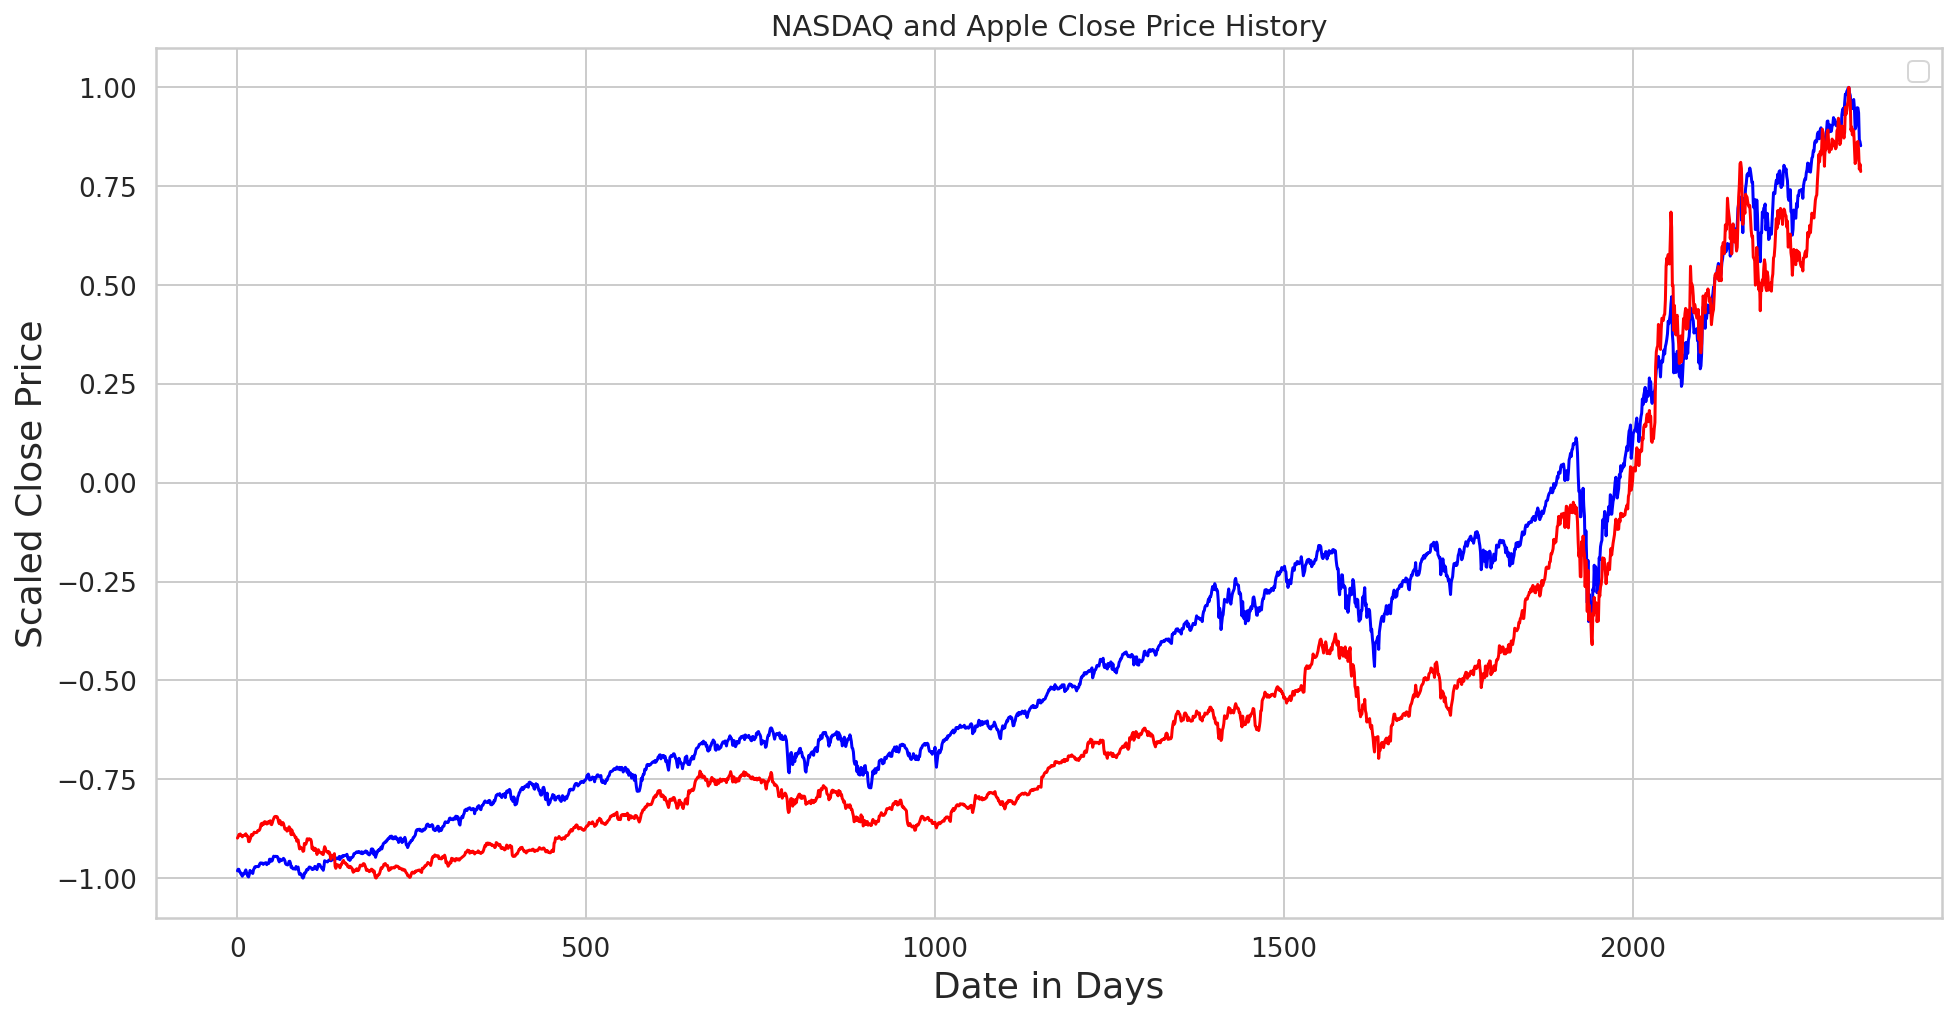

In [ ]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']
plt.figure(figsize=(16,8))
plt.plot(sc_df["Nasd_Close"],c='blue')
plt.plot(sc_df["Appl_Close"],c='red')
plt.title('NASDAQ and Apple Close Price History')
plt.xlabel('Date in Days', fontsize=18)
plt.ylabel('Scaled Close Price', fontsize=18)
plt.legend('Nasd_Close', 'Appl_Close')


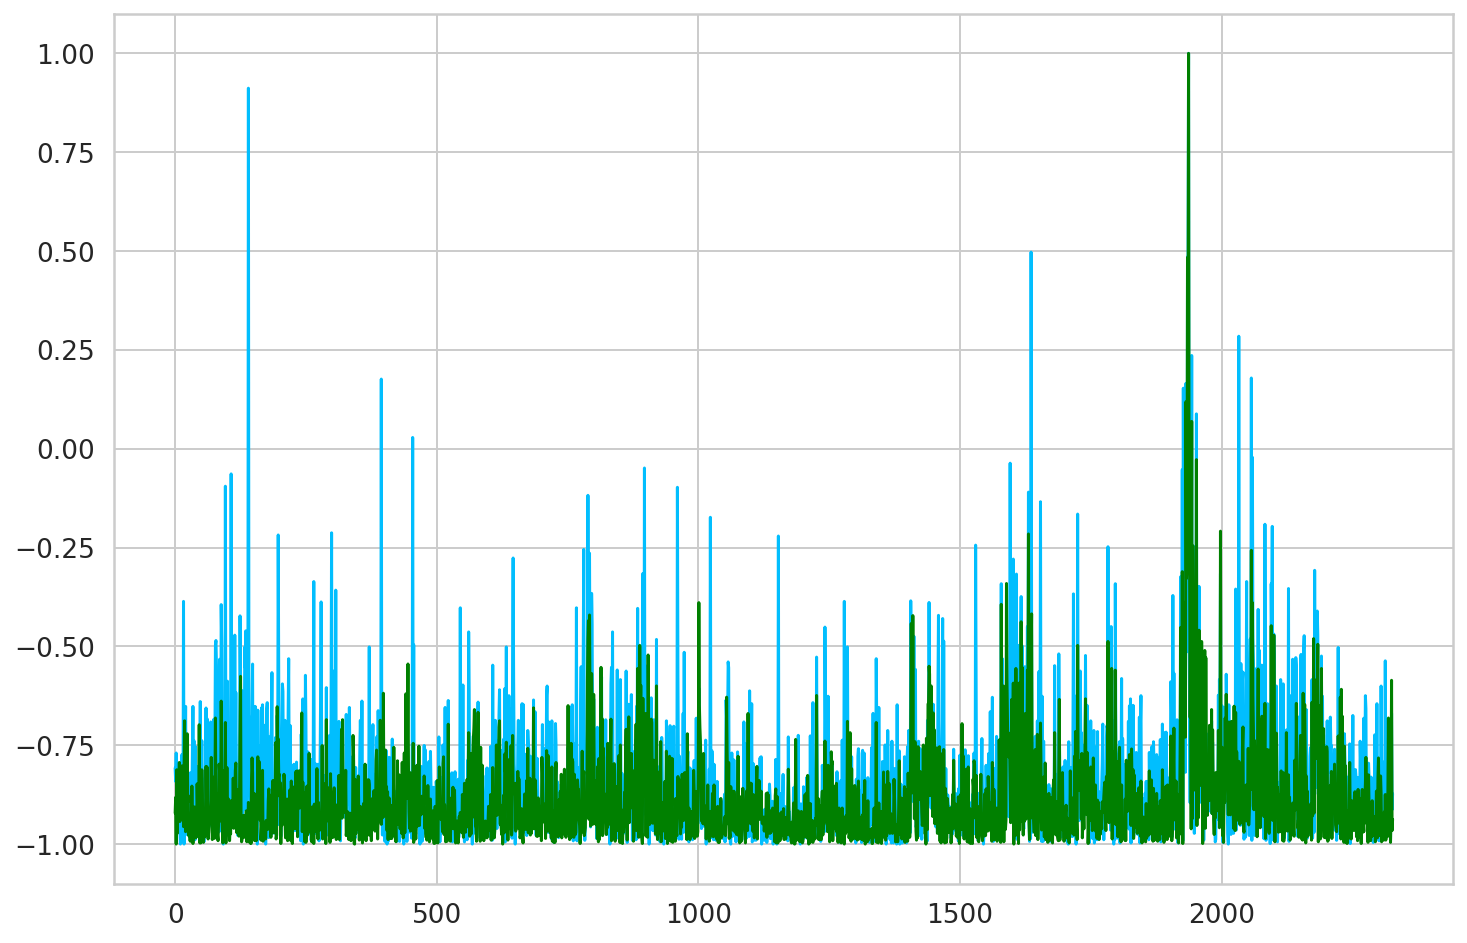

In [ ]:
plt.plot(sc_df["Appl_Diff_Percent"])
plt.plot(sc_df["Nasd_Diff_Percent"],c='green')

In [ ]:
row=[]

for _, row in tqdm(df.iterrows(), total=df.shape[0]):
  row_data = dict(
      Appl_Close= row.Appl_Close,
      Nasd_Close=row.Nasd_Close,
     
  )
  
features_df=pd.DataFrame(row)

  0%|          | 0/2328 [00:00<?, ?it/s]

In [ ]:
train_size=int(len(df1)*.8)
train_size

1862

In [ ]:
train_df, test_df = df1[:train_size], df1[train_size +1:]
train_df.shape, test_df.shape

((1862, 23), (465, 23))

In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(train_df)


In [ ]:
train_df=pd.DataFrame(
    scaler.transform(train_df),
    index=train_df.index,
    columns=train_df.columns
)

In [ ]:
test_df=pd.DataFrame(
    scaler.transform(test_df),
    index=test_df.index,
    columns=test_df.columns
)

In [ ]:
train_df.tail()

,Appl_Open,Appl_High,Appl_Low,Appl_Close,Appl_Adj_Close,Appl_Volume,Appl_Diff,Appl_Diff_Percent,Appl_EPS,Nasd_Open,Nasd_High,Nasd_Low,Nasd_Close,Nasd_Adj_Close,Nasd_Volume,Nasd_Diff,Nasd_Diff_Percent,Nasd_EPS,Unempl_rate,Bank_int_rate,Prev_Apl_Close,Prev_Nas_Close,Apl_Change
1857,0.980233,0.994595,0.988972,1.000000,1.000000,-0.941705,0.267062,-0.927711,1.0,0.982973,0.989543,0.988435,0.992773,0.992773,-0.134342,-0.020389,-0.960073,0.622378,-0.957447,0.333333,0.987129,0.989595,0.267062
1858,1.000000,1.000000,1.000000,0.992050,0.992547,-0.956593,0.103858,-0.954642,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,-0.121680,0.013235,-0.912886,0.622378,-0.957447,0.333333,1.000000,0.992773,0.103858
1859,0.977786,0.981793,0.952561,0.962900,0.963853,-0.914107,-0.062315,-0.834160,1.0,0.987995,0.995992,0.976213,0.984677,0.984677,0.115978,-0.173999,-0.811252,0.622378,-0.957447,0.333333,0.992050,1.000000,-0.062315
1860,0.960372,0.962165,0.959976,0.951543,0.953046,-0.892685,0.077151,-0.934798,1.0,0.982523,0.979411,0.982731,0.977519,0.977519,-0.130241,-0.106201,-0.912886,0.622378,-0.957447,0.333333,0.962900,0.984677,0.077151
1861,0.950018,0.954294,0.956744,0.949650,0.951183,-0.971913,0.151335,-0.988661,1.0,0.983454,0.981061,0.979308,0.982287,0.982287,-0.211952,-0.007182,-0.941924,0.622378,-0.957447,0.333333,0.951543,0.977519,0.151335


In [ ]:
test_df.head()

,Appl_Open,Appl_High,Appl_Low,Appl_Close,Appl_Adj_Close,Appl_Volume,Appl_Diff,Appl_Diff_Percent,Appl_EPS,Nasd_Open,Nasd_High,Nasd_Low,Nasd_Close,Nasd_Adj_Close,Nasd_Volume,Nasd_Diff,Nasd_Diff_Percent,Nasd_EPS,Unempl_rate,Bank_int_rate,Prev_Apl_Close,Prev_Nas_Close,Apl_Change
1863,0.990964,0.992035,0.972525,0.973121,0.974287,-0.915558,0.011869,-0.888023,1.0,1.019996,1.024405,1.031048,1.026953,1.026953,0.042331,-0.002056,-0.934664,0.622378,-0.957447,0.333333,0.992807,1.021567,0.011869
1864,0.978162,0.999810,0.999239,1.006814,1.006708,-0.972040,0.430267,-0.811481,1.0,1.031911,1.040512,1.043958,1.046922,1.046922,-0.272394,0.119030,-0.760436,0.622378,-0.957447,0.333333,0.973121,1.026953,0.430267
1865,0.987763,1.000000,1.004848,1.001136,1.001118,-0.998347,0.121662,-0.968816,1.0,1.036239,1.037516,1.044468,1.033071,1.033071,-0.566822,-0.161777,-0.833031,0.622378,-0.957447,0.333333,1.006814,1.046922,0.121662
1866,0.994070,1.002371,0.981557,0.971986,0.972797,-0.930706,-0.062315,-0.834160,1.0,1.033043,1.028977,1.001198,0.999069,0.999069,-0.052831,-0.329086,-0.586207,0.622378,-0.957447,0.333333,1.001136,1.033071,-0.062315
1867,0.909731,0.919683,0.913488,0.927314,0.929570,-0.902526,-0.183976,-0.742027,1.0,0.959123,0.977057,0.964607,0.982552,0.982552,-0.015128,-0.183903,-0.796733,0.622378,-0.957447,0.333333,0.971986,0.999069,-0.183976


In [ ]:
def create_sequences(input_data: pd.DataFrame, target_column, Sequence_length):

  sequence=[]
  data_size = len(input_data)

  for i in tqdm(range(data_size - sequence_length)):

    sequence = input_data[i:i+sequence_length]

    label_position = i + sequence_length
    label = input_data.iloc[label_position][target_column]

    sequences.append((sequence, label))

  return sequences

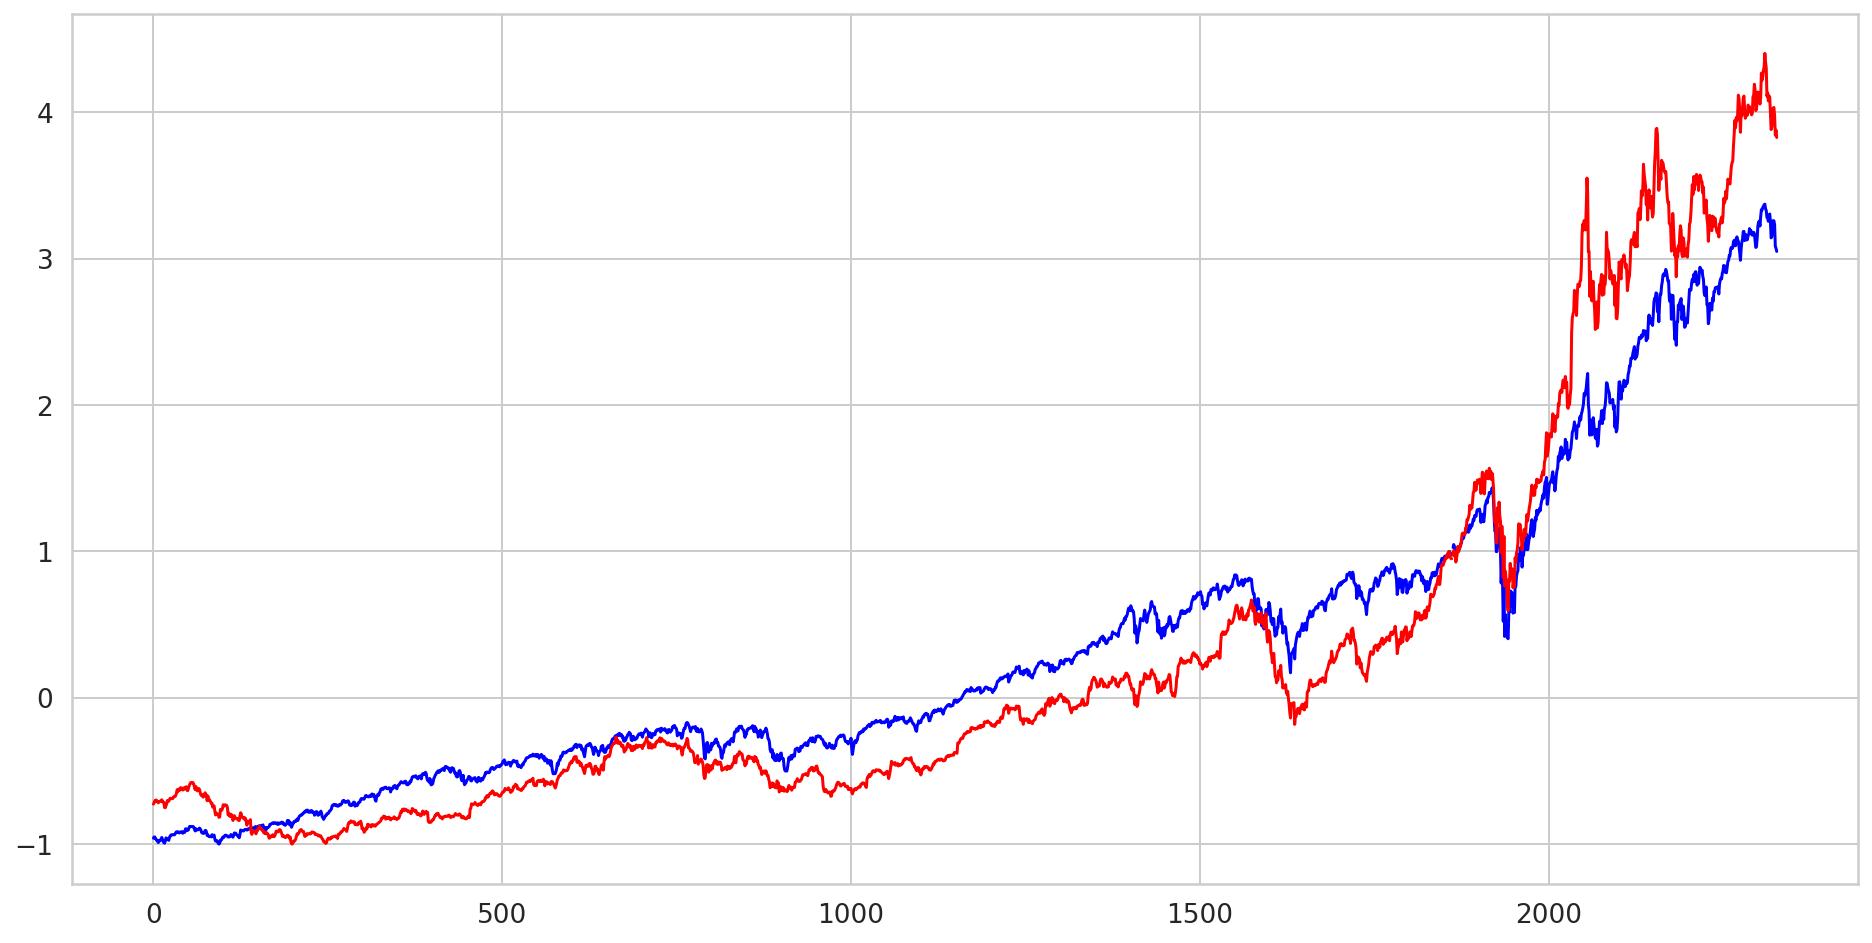

In [ ]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']
plt.figure(figsize=(16,8))
plt.plot(test_df["Nasd_Close"],label='Close Price',c='blue')
plt.plot(train_df["Nasd_Close"],label='Close Price',c='blue')
plt.plot(test_df["Appl_Close"],label='Close Price',c='red')
plt.plot(train_df["Appl_Close"],label='Close Price',c='red')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: The handle '_' has a label of '_' which cannot be automatically added to the legend.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Legend does not support 'A' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Legend does not support 'p' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Legend does not support 'l' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.h

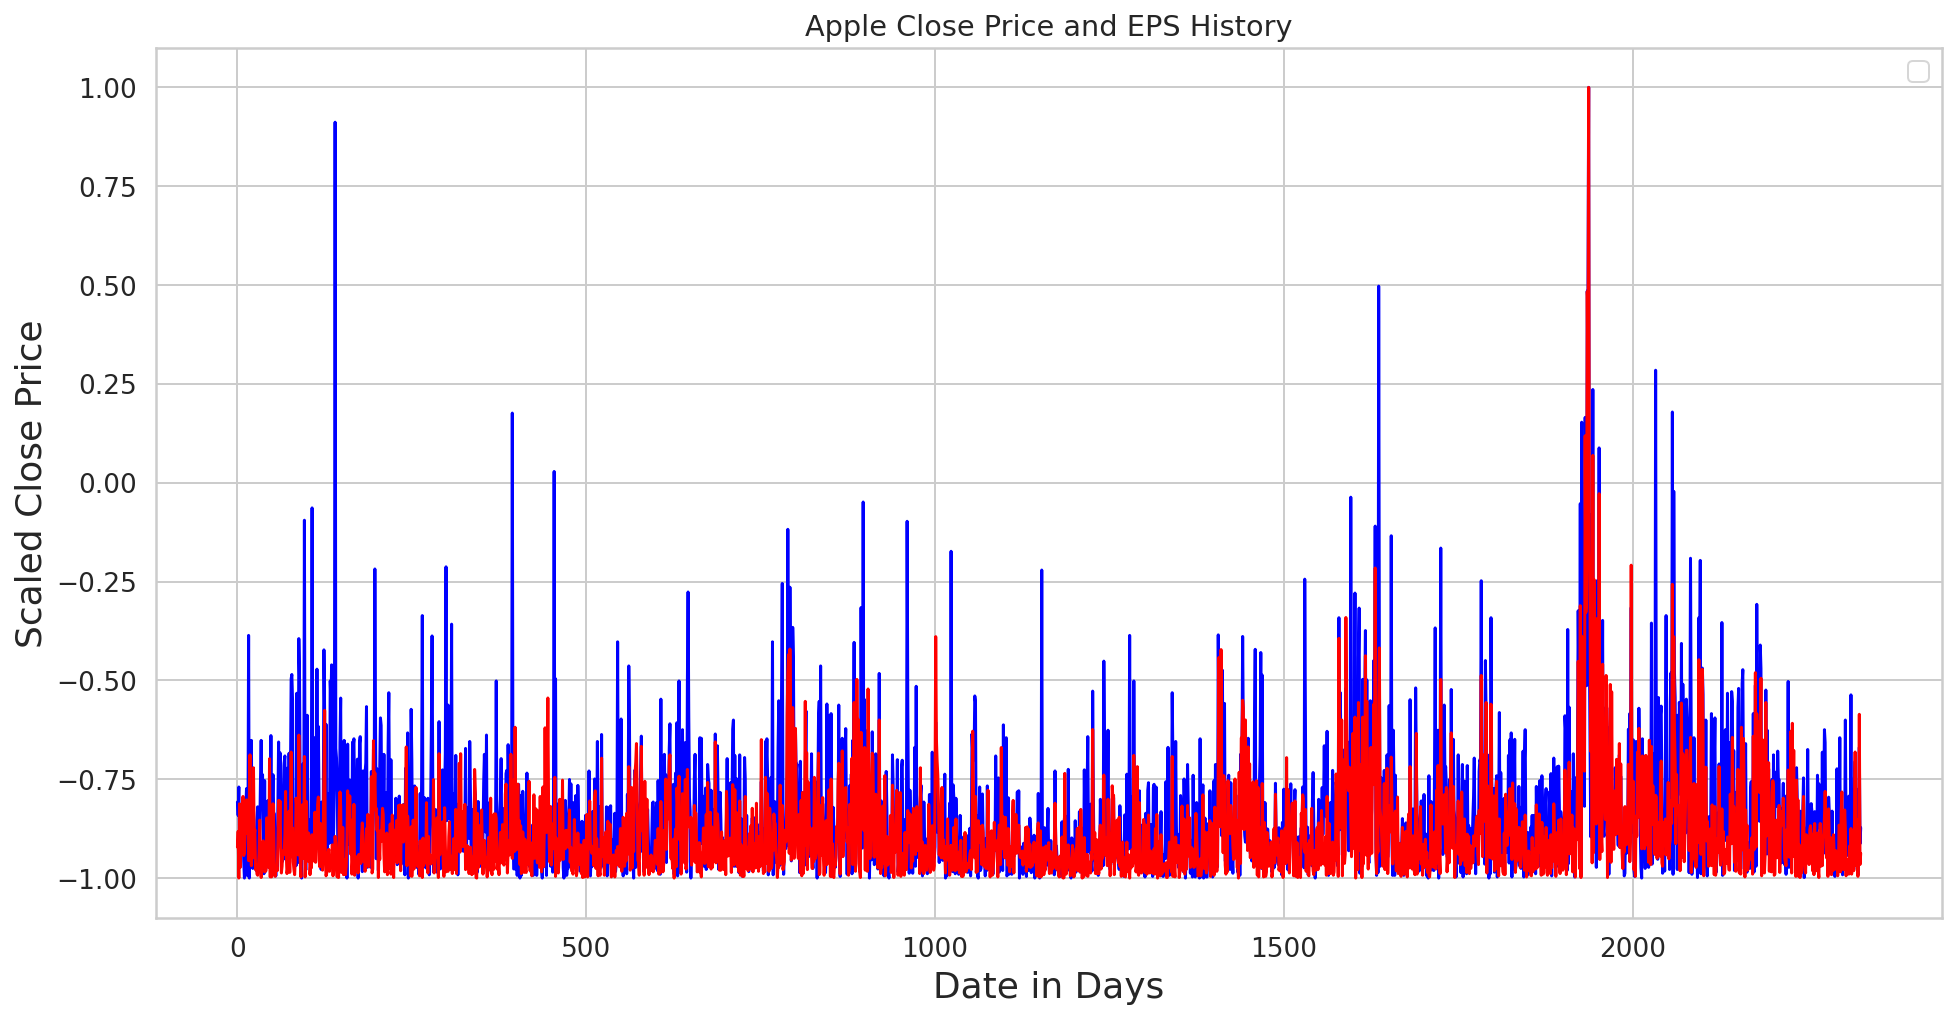

In [ ]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']
plt.figure(figsize=(16,8))
plt.plot(sc_df["Appl_Diff_Percent"],c='blue')
plt.plot(sc_df["Nasd_Diff_Percent"],c='red')
plt.title('Apple Close Price and EPS History')
plt.xlabel('Date in Days', fontsize=18)
plt.ylabel('Scaled Close Price', fontsize=18)
plt.legend('Appl_EPS', 'Appl_Close')

In [ ]:
!pip install dask-ml[xgboost]

     |████████████████████████████████| 148 kB 9.4 MB/s 
     |████████████████████████████████| 802 kB 15.5 MB/s 
     |████████████████████████████████| 15.7 MB 197 kB/s 
     |████████████████████████████████| 802 kB 58.0 MB/s 
     |████████████████████████████████| 793 kB 56.6 MB/s 
     |████████████████████████████████| 793 kB 53.4 MB/s 
     |████████████████████████████████| 791 kB 40.9 MB/s 
     |████████████████████████████████| 786 kB 47.9 MB/s 
     |████████████████████████████████| 779 kB 34.0 MB/s 
     |████████████████████████████████| 778 kB 35.3 MB/s 
     |████████████████████████████████| 776 kB 41.7 MB/s 
     |████████████████████████████████| 769 kB 57.3 MB/s 
     |████████████████████████████████| 766 kB 46.7 MB/s 
     |████████████████████████████████| 1.0 MB 35.7 MB/s 
     |████████████████████████████████| 722 kB 68.4 MB/s 
     |████████████████████████████████| 722 kB 57.6 MB/s 
     |████████████████████████████████| 715 kB 55.0 MB/s 
     |█████████